In [1]:
'''
7/22/2024

H2 Immiscibility PySR Code V2a
Data: Computational
Operators: log, sin, cos, tan, abs
Maxdepth and maxsize: Not included

Create 6 versions of the code:
w/ Computational data:
- V1a: Fit w/ log as the unary operator
- V1b: V1a w/ maxdepth and maxsize
- V2a: Fit w/ sin, cos, etc. log as unary operator
- V2b: V2a w/ maxdepth and maxsize

w/ Computational & Experimental data:
- V3a: Fit w/ sin, cos, log etc.
- V3b: V3a w/ maxdepth and maxsize


- Meet 7/24/2024 @ 4pm
- Meet 7/28/2024 @ 4pm
'''

## SHARED WITH Malik B -- 20240711

import numpy as np
from pysr import PySRRegressor
!pip install matplotlib
import matplotlib.pyplot as plt

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
#The following are the parameters estimated based on DFT calculations
W_V = -13.06
W_U = -299.54
W_S = -8.04
W_V2 = 490.89
lambda_X1 = 2.62
lambda_X2 = -0.68

R_const = 8.314 # J/mol-K -- gas constant
grid_size = 10000

In [3]:
#get random samples of T
# T_mock_arr = np.random.uniform(750,6000,grid_size)
T_mock_data = np.array([750, 1000, 1500, 2000, 3000, 4000])
# T_mock_arr = np.zeros((grid_size))
T_mock_arr = np.random.choice(T_mock_data, grid_size)
# T_mock_arr = T_mock_arr + 3000
# T_mock_arr = np.linspace(750,6000,grid_size)

#get random samples of X_H2
XH2_mock_arr = np.random.uniform(0.01,0.99,grid_size)
# XH2_mock_arr = np.linspace(0.01,0.99,grid_size) # X_H2

T_arr = []#np.zeros((grid_size,grid_size,grid_size))
P_arr = []#np.zeros((grid_size,grid_size,grid_size))
XH2_arr = []#np.zeros((grid_size,grid_size,grid_size))
P_norm_arr = []

################################################################################################
# This function is basically f(X_H2,T,P) = 0; X_H2O = 1 - X_H2
################################################################################################

In [4]:
len(T_mock_arr), T_mock_arr

(10000, array([1000, 1000,  750, ..., 3000, 2000, 1500]))

In [5]:
def est_W_params_w_Y(T_d, Y_d, W_V, W_U, W_S, W_V2=0, W_V3=0, W_V4=0, flag_return_value=0):

    temp1 = (W_V + (((T_d/1000)**(-2))*W_V2))
    temp2 = (R_const*T_d*(np.log( Y_d/(1-Y_d) )) )/(2.*(2*Y_d - 1))
    temp3 = W_U - (T_d)*W_S
    P_est = (temp2 - temp3)/temp1

    if flag_return_value == 1:  
        return temp1 # W_V_eff
    if flag_return_value == 2:  
        return temp3 # W_0 or W_U - T*W_S
    else:
        return P_est
################################################################################################
################################################################################################

In [6]:
def est_lambda_X_eff(T_d, lambda_X1, lambda_X2, flag_return_value=0):

    lambda_X_eff = lambda_X1 + (lambda_X2/(T_d/1000))

    return lambda_X_eff
################################################################################################
################################################################################################

In [7]:

X_mock_P_min = np.random.uniform(0.01,0.99,1000)
P_min_arr = []

for ind1 in range(len(T_mock_data)):
    P_arr_T = []
    for ind2 in range(len(X_mock_P_min)):
        T_mock = T_mock_data[ind1]
        X_mock = X_mock_P_min[ind2]
    
        lambda_X_eff = est_lambda_X_eff(T_mock, lambda_X1, lambda_X2)
        lambda_X = lambda_X_eff
        
        Y_mock = X_mock/(X_mock + lambda_X*(1-X_mock))
        
        P_mock = est_W_params_w_Y(T_mock, Y_mock, W_V, W_U, W_S, W_V2=W_V2 )
    
        P_arr_T = np.append(P_arr_T, P_mock)

    P_min_arr = np.append(P_min_arr, np.min(P_arr_T))



In [8]:
print(P_min_arr)

[ 0.58750632  1.20033807  3.46417911  7.72862794 27.03592011 79.19934077]


In [9]:
################################################################################################
# This is for creating an array for immiscibility curve
################################################################################################
# for ind2 in range(len(XH2_mock_arr)):
for ind1 in range(len(T_mock_arr)):
    T_mock = T_mock_arr[ind1]
    X_mock = XH2_mock_arr[ind1]

    lambda_X_eff = est_lambda_X_eff(T_mock, lambda_X1, lambda_X2)
    lambda_X = lambda_X_eff
    
    Y_mock = X_mock/(X_mock + lambda_X*(1-X_mock))
    
    P_mock = est_W_params_w_Y(T_mock, Y_mock, W_V, W_U, W_S, W_V2=W_V2 )

    T_arr = np.append(T_arr, T_mock)
    P_arr = np.append(P_arr, P_mock)
    XH2_arr = np.append(XH2_arr, X_mock)

    if(T_mock == 750):
        P_mock_norm = P_mock/P_min_arr[0]
    if(T_mock == 1000):
        P_mock_norm = P_mock/P_min_arr[1]
    if(T_mock == 1500):
        P_mock_norm = P_mock/P_min_arr[2]
    if(T_mock == 2000):
        P_mock_norm = P_mock/P_min_arr[3]
    if(T_mock == 3000):
        P_mock_norm = P_mock/P_min_arr[4]
    if(T_mock == 4000):
        P_mock_norm = P_mock/P_min_arr[5]

    P_norm_arr = np.append(P_norm_arr, P_mock_norm)
        
################################################################################################
################################################################################################

In [10]:
## Use arrays T_arr, P_arr, XH2_arr as your "X" and "Y"

# Use XH_2_arr and T_arr as the independent variables (X)
X = np.column_stack((XH2_arr, T_arr))

# Use P_arr as the dependent variable (Y)
Y = P_norm_arr

In [11]:
# Instantiate and fit PySRRegressor
model = PySRRegressor(
        niterations=40,
        binary_operators=["+", "*", "-", "/"],
        unary_operators=[
            "log",
            "sin",
            "cos",
            "tan",
            "abs"
        ],
        elementwise_loss="loss(prediction, target) = (prediction - target)^2",
        warm_start=False,
    )

In [12]:
# Fit the new data
model.fit(X, Y)

/home/mb1943/.conda/envs/usrp24/lib/python3.12/site-packages/pysr/sr.py:1307: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 7.500e+03
Head worker occupation: 20.8%
Progress: 29 / 600 total iterations (4.833%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           3.808e+01  7.971e+00  y = log(x₁)
4           2.177e+01  2.796e-01  y = abs(0.65505 / x₀)
5           1.975e+01  9.752e-02  y = (0.65505 / x₀) + x₀
6           1.650e+01  1.799e-01  y = tan(1.0508) + (0.65505 / x₀)
7           1.352e+01  1.991e-01  y = abs(tan(1.4121 - x₀) / 0.28079)
10          9.576e+00  1.149e-01  y = abs(abs((-2.3009 + -1.7614) * log(tan(tan(x₀)))))
11          7.553e+00  2.373e-01  y = abs(tan(tan(cos(-0.56419) - (x₀ * 1.412))) / 0.072546)
12          5.857e+00  2.543e-01  y = abs((cos(x₀) - (-2.3009 + -1.7614)) * log(tan(tan(x₀))))
13          5.133e+00  1.319e-01  y = abs((tan(cos(x₀)) - (-2.3009 + -1.7614)) * log(tan(tan(x₀)...
                                  )))
17          4

PySRRegressor.equations_ = [
	    pick      score                                           equation  \
	0          0.000000                                                 x1   
	1         11.952612                                      abs(-5.50213)   
	2          0.482791                                     0.6392249 / x0   
	3          0.012526                                0.6392249 / sin(x0)   
	4          0.484585                          abs(-5.4991345 * log(x0))   
	5          0.328733                 abs(1.8155489 / (0.04790721 + x0))   
	6          0.524203                 abs(-5.463955 * log(tan(tan(x0))))   
	7          0.161225              abs(-4.2808404 - (log(x1) * log(x0)))   
	8          0.105413            abs(log(x1) * log(tan(x0) / 0.6481608))   
	9          0.237091    abs(log(tan(tan(x0))) * (-1.9915752 + log(x1)))   
	10         0.353262  abs(abs(log(x1) * log(tan(tan(x0)))) - 3.3957317)   
	11         0.066482  abs(((log(x1) - 0.68873906) * abs(log(tan(tan(...   
	12         0.211290  abs((log(tan(tan(x0))) / -0.47852322) * (log(x...   
	13         0.478187  abs(((abs(log(tan(tan(x0)))) / -0.36988643) - ...   
	14  >>>>   0.237761  ((log(x1) + -4.4576874) * abs(log(tan(x0)) / (...   
	15         0.112139  abs((-4.5276318 + log(x1)) * (log(tan(tan(x0))...   
	16         0.094803  abs((log(x1) + -4.5276318) * (log(tan(tan(x0))...   
	
	            loss  complexity  
	0   5.469544e+06           1  
	1   3.523689e+01           2  
	2   2.174323e+01           3  
	3   2.147256e+01           4  
	4   1.322608e+01           5  
	5   9.520599e+00           6  
	6   5.636454e+00           7  
	7   4.797187e+00           8  
	8   4.317244e+00           9  
	9   3.405958e+00          10  
	10  2.392322e+00          11  
	11  2.094472e+00          13  
	12  1.695557e+00          14  
	13  1.051087e+00          15  
	14  6.533145e-01          17  
	15  5.220592e-01          19  
	16  4.748399e-01          20  
]

In [13]:
# Make plots of different losses

# Access the chosen best fit equation
model.equations_
eqn_num = 14

best_fit = model.equations_.loc[eqn_num][3]
print('best_fit =', best_fit)

/tmp/ipykernel_478427/3133097287.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_fit = model.equations_.loc[eqn_num][3]


best_fit = ((log(x1) + -4.4576874) * abs(log(tan(x0)) / (x0 - -0.44780815))) + tan(tan(x0))


In [14]:
 model.equations_.sympy_format[eqn_num]

(log(x1) - 4.4576874)*Abs(log(tan(x0))/(x0 + 0.44780815)) + tan(tan(x0))

In [22]:
# Better way to call function:
f = model.equations_.lambda_format[eqn_num]

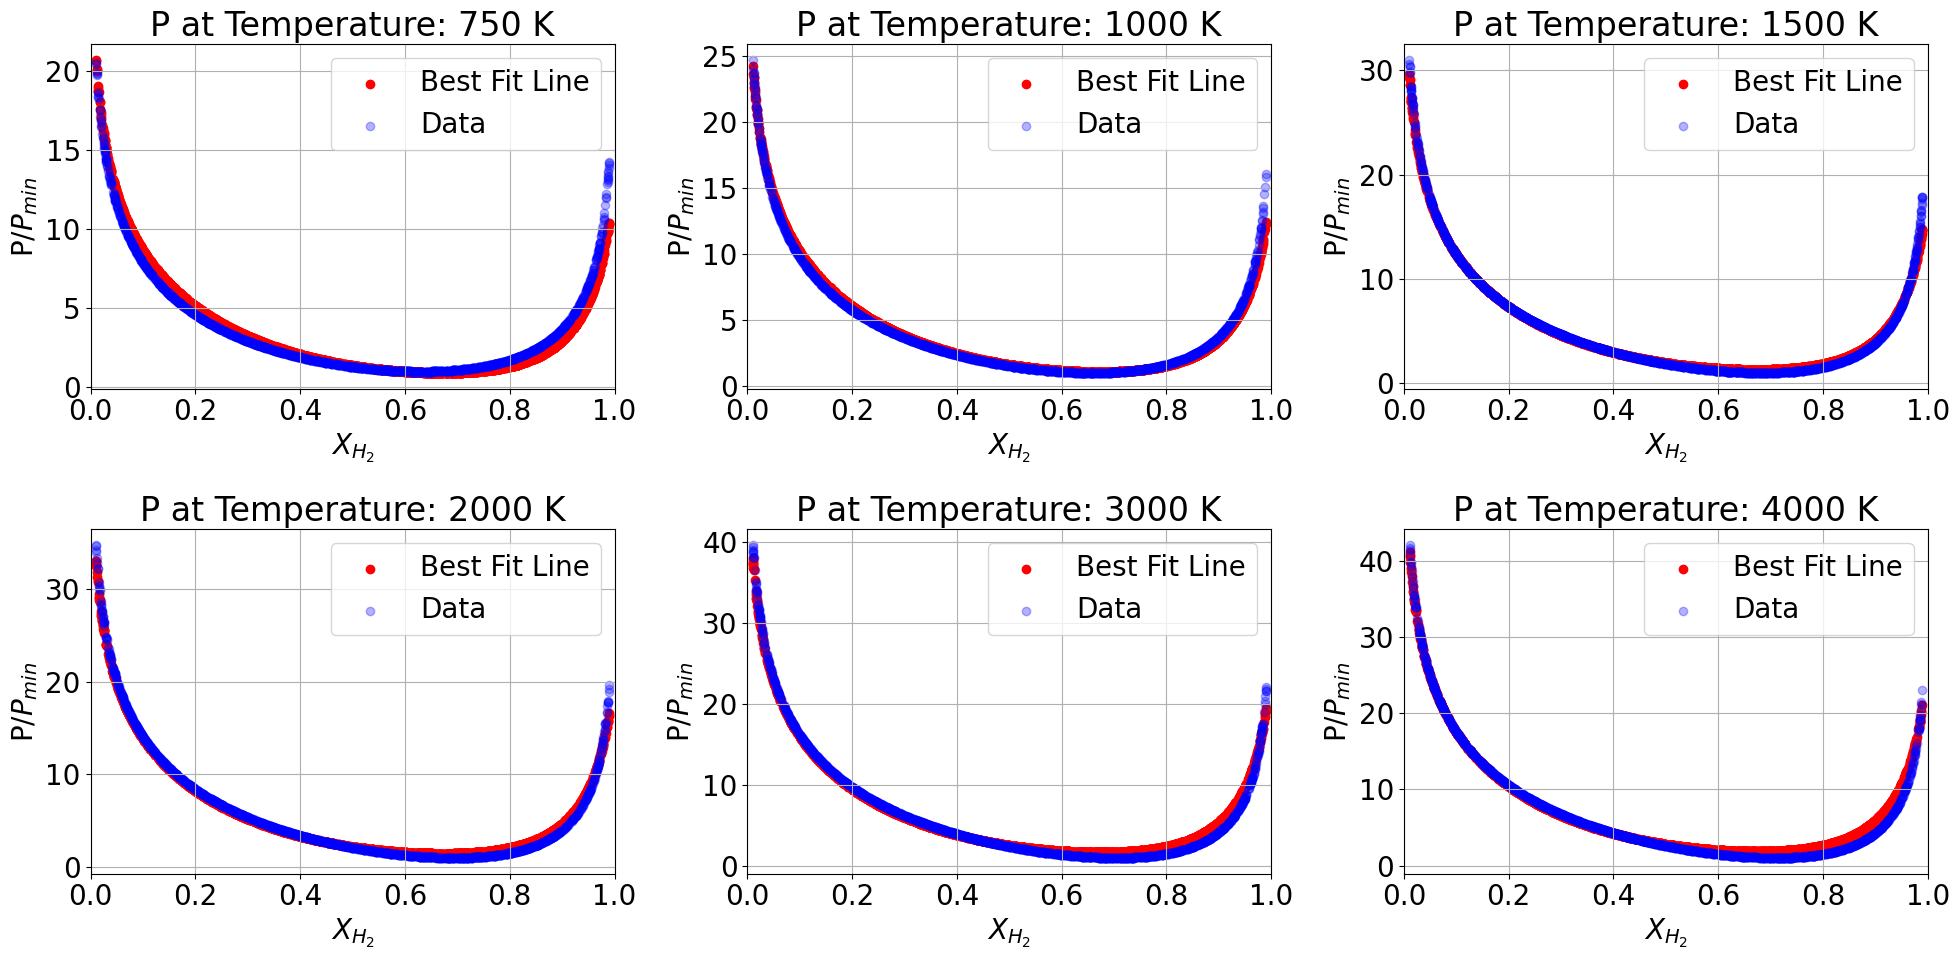

In [26]:
# Temperatures to loop over
temperatures = [750, 1000, 1500, 2000, 3000, 4000]
    
# Create figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.rcParams['font.size'] = 20

for i, temp in enumerate(temperatures):
    ind_arr = np.where(T_arr == temp)[0]
    
    # Refined data
    T_plot = T_arr[ind_arr]
    P_plot = P_norm_arr[ind_arr]
    XH2_plot = XH2_arr[ind_arr]

    # Replace x0 with XH2_plot and x1 with XH2_plot
    x0 = XH2_plot
    x1 = T_plot

    # Predict Y values
    Y_pred = np.abs(((4.971377 - np.log(x1)) / 0.30998802) * np.log(np.sin(np.sin(1.971501 * np.tan(x0)))))

    # Select subplot
    ax = axes[i // 3, i % 3] 
    
    # Plot the data and the best fit line
    ax.scatter(XH2_plot, Y_pred, label='Best Fit Line', color='red')
    ax.scatter(XH2_plot, P_plot, label='Data', color='blue', alpha=0.3)
    ax.set_xlabel(r'$X_{H_{2}}$')
    ax.set_ylabel('''P/$P_{min}$''')
    ax.set_title(f'P at Temperature: {temp} K')
    ax.legend()
    ax.grid(True)
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()